In [12]:
āimport requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "http://books.toscrape.com/catalogue/page-{}.html" #SETTING BASIC URL
books = [] #EMPTY LIST TO STORE DATA

rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
} #CONVERT RATINGS INTO NUMBERS

for page in range(1, 51): #LOOP THROUGH ALL 50 PAGES
    url = base_url.format(page)
    response = requests.get(url) #GET HTML CONTENT OF ALL 50 PAGES
    soup = BeautifulSoup(response.content, "html.parser") #PARSING THE CONTENT USING BS

    articles = soup.find_all("article", class_="product_pod") #GETTING EACH BOOK INFO FROM EACH PAGE #EACH BBOK INFO IS UNDER THE TAG <Article class="product_pod">
    
    for article in articles: #LOOP THROUGH EACH BOOK
        title = article.h3.a["title"] #TITLE OF THE BOOK IS UNDER h3 class
        price = article.find("p", class_="price_color").text.strip()[1:] #FOUND IN A <p class="price_color">, and remove the £ sign
        availability = article.find("p", class_="instock availability").text.strip() #FOUND IN <p class="instock availability"> AND STRIPPED OF WHITESPACE
        rating_class = article.p["class"][1]  
        rating = rating_map.get(rating_class, None)

        books.append({
            "Title": title,
            "Price (£)": float(price),
            "Availability": availability,
            "Rating": rating
        }) #DATA IS STORED IN THE DICTIONARY WITH FOLLOWING DATA

df = pd.DataFrame(books) #CONVERTS THE LIST INTO PASSING DATAFRAME

df.to_csv("books_data.csv", index=False) #SAVES THE FILE AS A CSV FILE


In [13]:
df

,Title,Price (£),Availability,Rating
0,A Light in the Attic,51.77,In stock,3
1,Tipping the Velvet,53.74,In stock,1
2,Soumission,50.10,In stock,1
3,Sharp Objects,47.82,In stock,4
4,Sapiens: A Brief History of Humankind,54.23,In stock,5
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,In stock,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,In stock,4
997,A Spy's Devotion (The Regency Spies of London #1),16.97,In stock,5
998,1st to Die (Women's Murder Club #1),53.98,In stock,1


In [20]:
import pandas as pd

# Load the data
df = pd.read_csv("books_data.csv")

# Clean and convert columns
df['Price (£)'] = df['Price (£)'].astype(float)
df['Availability'] = df['Availability'].astype(str).str.extract(r'(\d+)').fillna(0).astype(int)

# Display basic stats
print("📚 Total books:", len(df))
print("💷 Average price: £", round(df['Price (£)'].mean(), 2))
print("⭐ Average rating:", round(df['Rating'].mean(), 2))
print("\n🔍 Missing values:\n", df.isnull().sum())
print("\n📊 Data types:\n", df.dtypes)


📚 Total books: 1000
💷 Average price: £ 35.07
⭐ Average rating: 2.92

🔍 Missing values:
 Title           0
Price (£)       0
Availability    0
Rating          0
dtype: int64

📊 Data types:
 Title            object
Price (£)       float64
Availability      int32
Rating            int64
dtype: object


C:\Users\Shree\AppData\Local\Temp\ipykernel_1372\2061421146.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Availability'] = df['Availability'].astype(str).str.extract(r'(\d+)').fillna(0).astype(int)


C:\Users\Shree\AppData\Local\Temp\ipykernel_1372\2762402215.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='coolwarm')


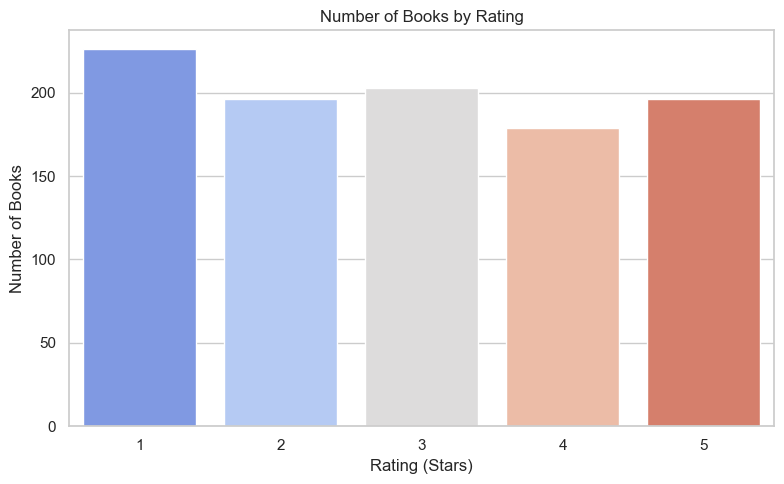

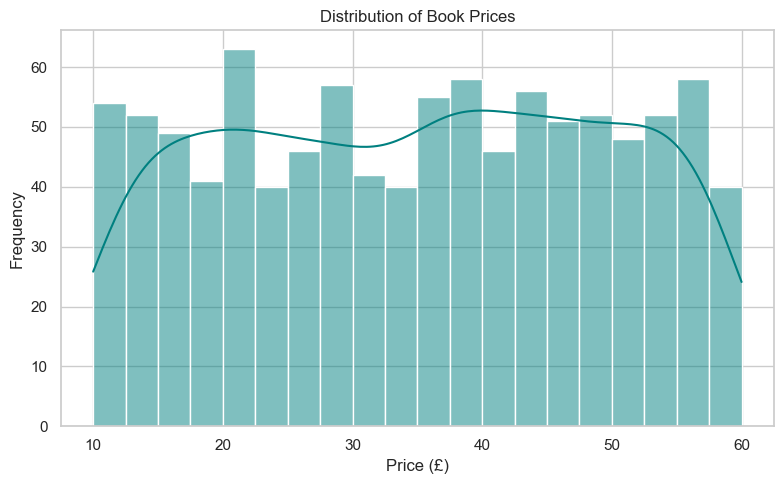

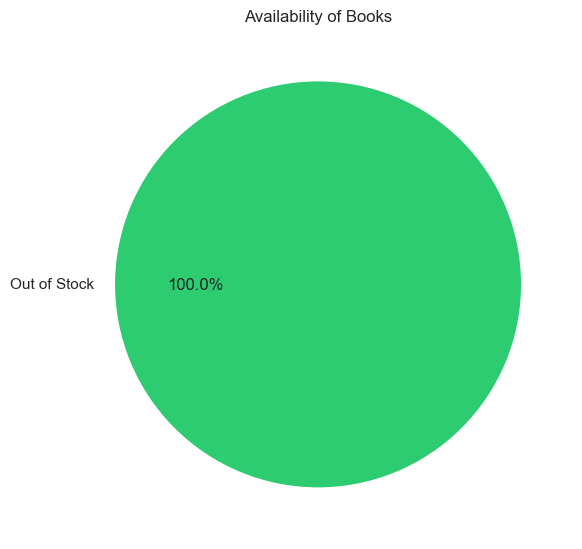

C:\Users\Shree\AppData\Local\Temp\ipykernel_1372\2762402215.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Price (£)', data=df, palette='pastel')


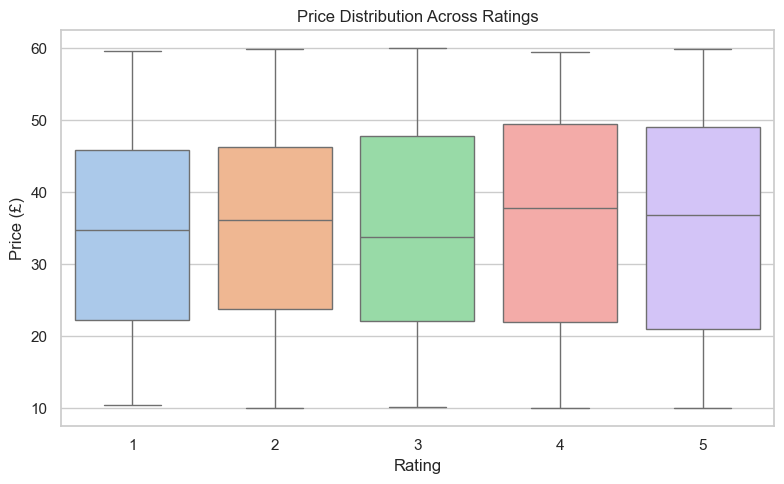

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn style
sns.set(style="whitegrid")

# 1️⃣ Bar Chart: Number of books per rating
plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=df, palette='coolwarm')
plt.title('Number of Books by Rating')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Books')
plt.tight_layout()
plt.show()

# 2️⃣ Histogram: Book price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price (£)'], bins=20, kde=True, color='teal')
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3️⃣ Pie Chart: In Stock vs Out of Stock
df['Stock Status'] = df['Availability'].apply(lambda x: 'In Stock' if x > 0 else 'Out of Stock')
stock_counts = df['Stock Status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(stock_counts, labels=stock_counts.index, autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
plt.title('Availability of Books')
plt.tight_layout()
plt.show()

# 4️⃣ Creative: Boxplot of Price by Rating
plt.figure(figsize=(8,5))
sns.boxplot(x='Rating', y='Price (£)', data=df, palette='pastel')
plt.title('Price Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Price (£)')
plt.tight_layout()
plt.show()
